In [2]:
#Импорт и настройка
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_frame = pd.read_csv('D:\\HR_comma_sep.csv')
data_frame.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Минимум: 0.09 максимум: 1.0
Среднее 0.6128335222348166


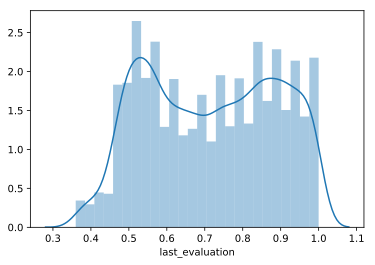

In [5]:
min = data_frame['satisfaction_level'].min()
max = data_frame['satisfaction_level'].max()
mean = data_frame['satisfaction_level'].mean()
print('Минимум: ' + str(min) + ' максимум: ' + str(max))
print('Среднее ' + str(mean))
sns.distplot(data_frame['last_evaluation'])

In [6]:
min = data_frame['last_evaluation'].min()
max = data_frame['last_evaluation'].max()
mean = data_frame['last_evaluation'].mean()
print('Минимум: ' + str(min) + ' максимум: ' + str(max))
print('Среднее ' + str(mean))

Минимум: 0.36 максимум: 1.0
Среднее 0.7161017401159978


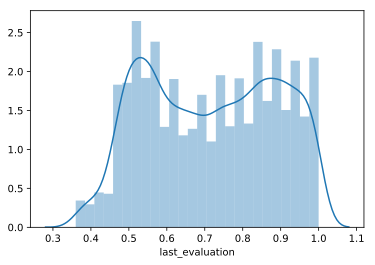

In [7]:
sns.distplot(data_frame['last_evaluation'])

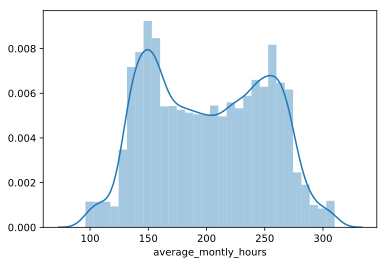

In [8]:
sns.distplot(data_frame['average_montly_hours'])

In [9]:
data_frame['average_montly_hours'].mean()

201.0503366891126

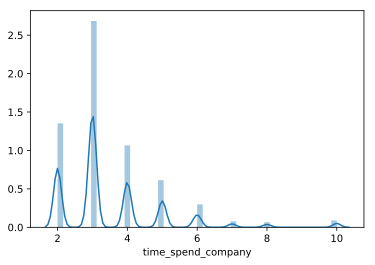

In [10]:
data_frame['time_spend_company'].mean()
sns.distplot(data_frame['time_spend_company'])


In [11]:
data_frame['time_spend_company'].value_counts(normalize=True)


3     0.429562
2     0.216281
4     0.170478
5     0.098207
6     0.047870
10    0.014268
7     0.012534
8     0.010801
Name: time_spend_company, dtype: float64

In [12]:
data_frame.rename(columns={'Work_accident' : 'work_accident'}, inplace=True)
data_frame['work_accident'].value_counts(normalize=True)



0    0.85539
1    0.14461
Name: work_accident, dtype: float64

In [13]:
data_frame['promotion_last_5years'].value_counts()


0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [15]:
data_frame.rename(columns={'sales' : 'department'}, inplace=True)
data_frame['department'].value_counts(normalize=True)


sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64

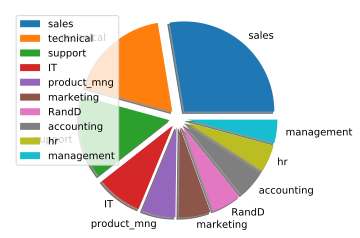

In [16]:
plt.pie(data_frame['department'].value_counts().values, 
        labels=data_frame['department'].value_counts().index,
        explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        shadow=True)
plt.legend()
plt.axis('equal')
plt.show()


In [17]:
data_frame['salary'].value_counts(normalize=True)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

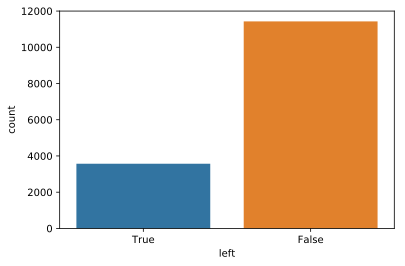

In [18]:
data_frame['left'] = data_frame['left'].map({0 : 'False', 1 : 'True'})
sns.countplot(data_frame['left'])

In [19]:
data_frame['left'].value_counts(normalize=True)

False    0.761917
True     0.238083
Name: left, dtype: float64

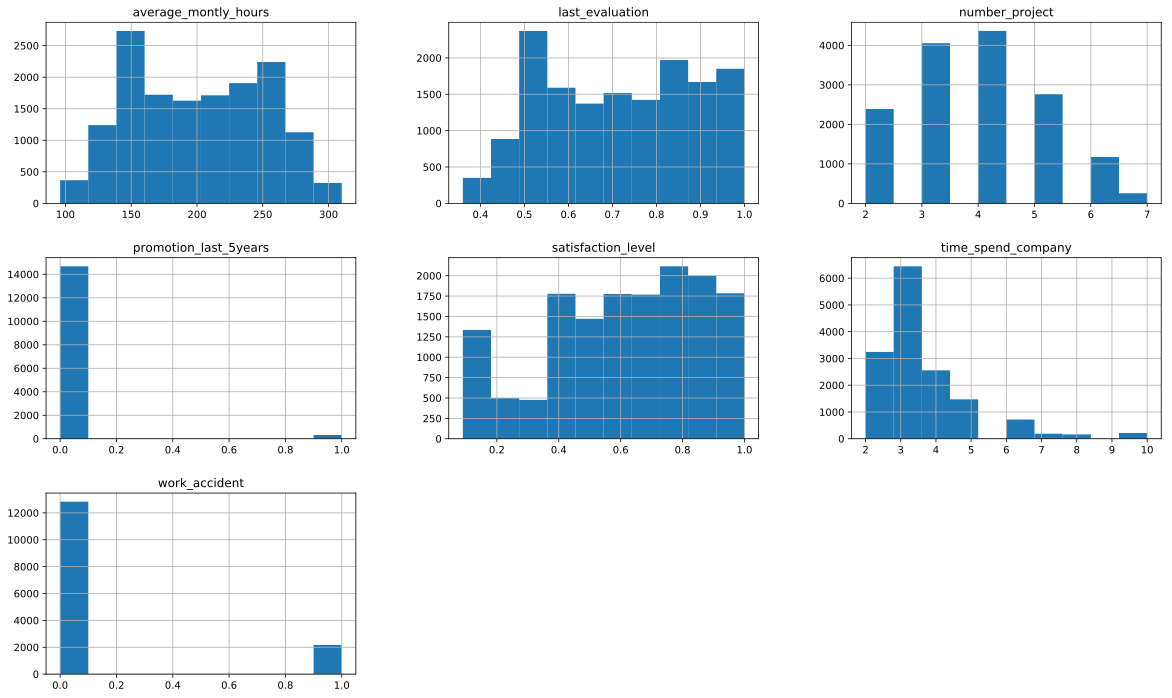

In [20]:
data_frame.hist(figsize=(20,12));


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


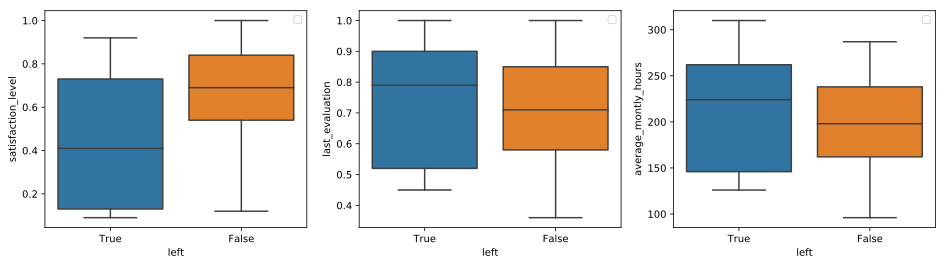

In [21]:
quantitative_features = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

for index, feature in  enumerate(quantitative_features):
    sns.boxplot(x='left', y=feature, data=data_frame, ax=axes[index])
    axes[index].legend()
    axes[index].set_xlabel('left')
    axes[index].set_ylabel(feature)

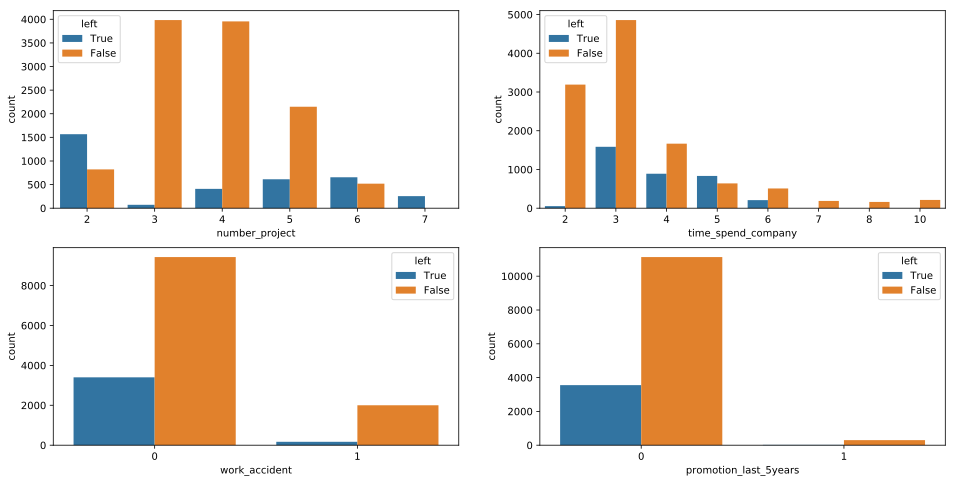

In [22]:
ordinal_features = ['number_project', 
                    'time_spend_company', 
                    'work_accident',
                    'promotion_last_5years']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

for index, feature in  enumerate(ordinal_features):
    sns.countplot(x=feature, hue='left', data=data_frame, ax=axes[index//2, index%2])
 

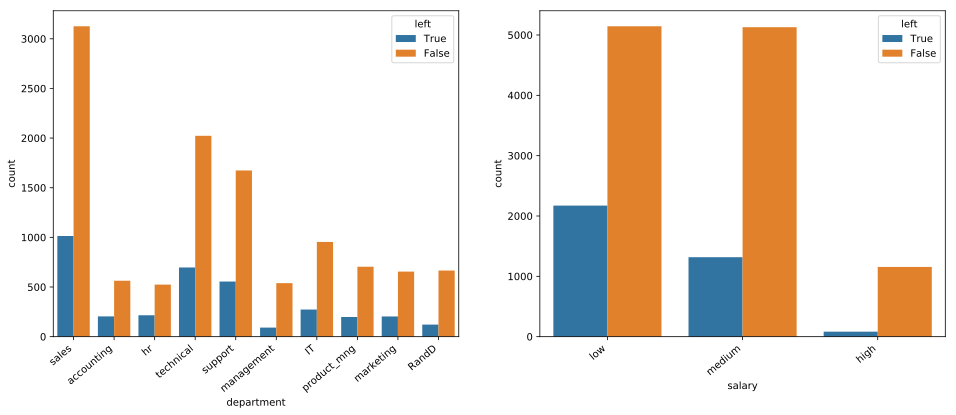

In [23]:
object_features = ['department', 
                   'salary']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
for index, feature in enumerate(object_features):
    count_plot = sns.countplot(x=feature, hue='left', data=data_frame, ax=axes[index])
    count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=40, ha="right");


In [24]:
data_frame['number_project'].value_counts(normalize=True)

4    0.291019
3    0.270351
5    0.184079
2    0.159211
6    0.078272
7    0.017068
Name: number_project, dtype: float64